In [146]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import mne
import json
import warnings
warnings.filterwarnings('ignore')

In [147]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

In [148]:
#IDS: sub-WSAS09,10,11,12,13,20,25,27,28,29
ID = "20"

In [149]:
# load data
with open(f"RESULTS/WSAS_new/ARI_dynamic_alpha_WSAS{ID}.txt", "r") as fp:
    # Load the dictionary from the file
    data = json.load(fp)

dPLI_ARI_Indu = data['dPLI_ARI_Indu']
Hub_ARI_Indu = data['Hub_ARI_Indu']

dPLI_ARI_Anes = data['dPLI_ARI_Anes']
Hub_ARI_Anes = data['Hub_ARI_Anes']


dPLI_ARI_Emer = data['dPLI_ARI_Emer']
Hub_ARI_Emer = data['Hub_ARI_Emer']

dPLI_ARI_Reco = data['dPLI_ARI_Reco']
Hub_ARI_Reco = data['Hub_ARI_Reco']

conc_dpli_ARI = np.concatenate((dPLI_ARI_Indu,dPLI_ARI_Anes,dPLI_ARI_Emer,dPLI_ARI_Reco))
conc_Hub_ARI = np.concatenate((Hub_ARI_Indu,Hub_ARI_Anes,Hub_ARI_Emer,Hub_ARI_Reco))
len(conc_Hub_ARI)

176

In [150]:
start_Anes = len(dPLI_ARI_Indu)
start_Emer = len(dPLI_ARI_Indu)+len(dPLI_ARI_Anes)
start_Reco = len(dPLI_ARI_Indu)+len(dPLI_ARI_Anes)+len(dPLI_ARI_Emer)


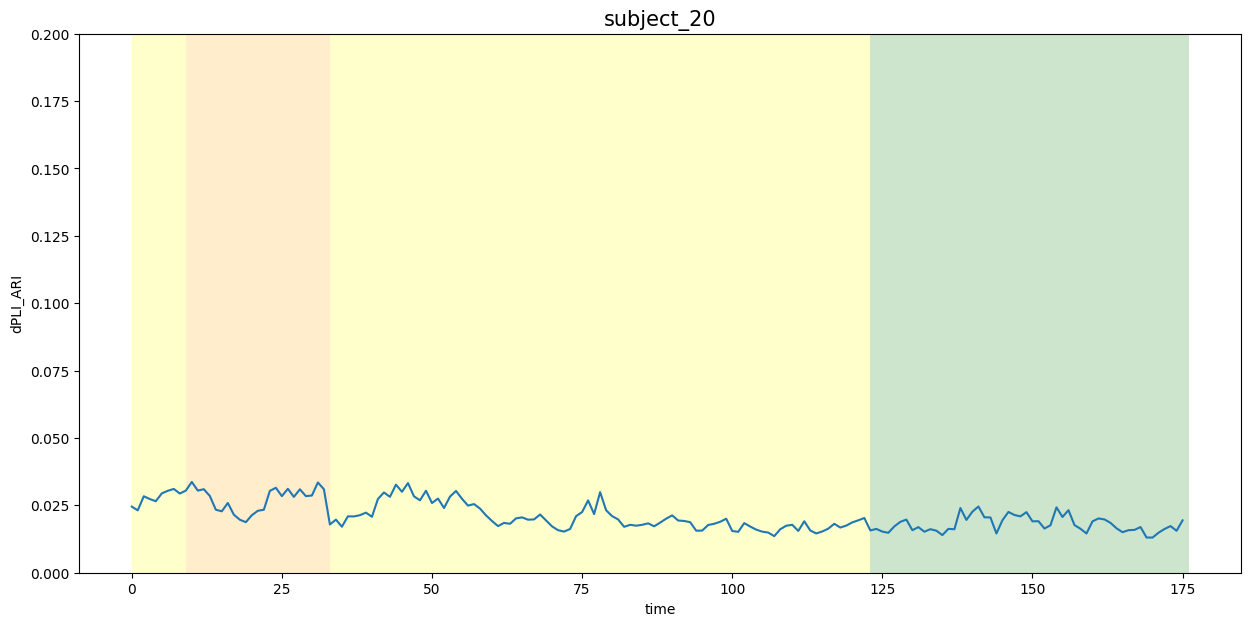

In [151]:
plt.figure(figsize=(15,7))
data_tmp = conc_dpli_ARI

plt.axvspan(0,start_Anes, facecolor='yellow', alpha=0.2)
plt.axvspan(start_Anes,start_Emer, facecolor='orange', alpha=0.2)
plt.axvspan(start_Emer,start_Reco, facecolor='yellow', alpha=0.2)
plt.axvspan(start_Reco,len(data_tmp), facecolor='green', alpha=0.2)

plt.plot(data_tmp, alpha = 1)

#plt.xlim(3, len(data)-3)
plt.xlabel("time")
plt.ylabel('dPLI_ARI')
plt.ylim(0,0.2)

plt.title(f'subject_{ID}', fontsize = 15)
plt.savefig(f'FIGURES/dPLI_ARI_subject_{ID}.png',dpi=300)

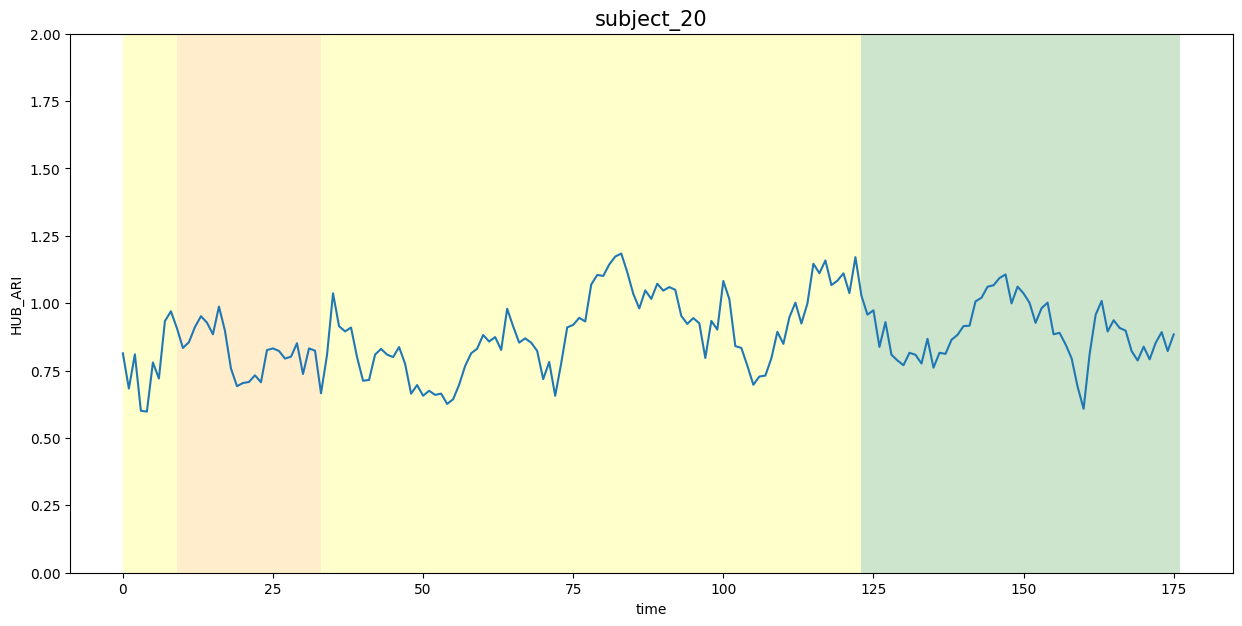

In [152]:
plt.figure(figsize=(15,7))
data_tmp = conc_Hub_ARI

plt.axvspan(0,start_Anes, facecolor='yellow', alpha=0.2)
plt.axvspan(start_Anes,start_Emer, facecolor='orange', alpha=0.2)
plt.axvspan(start_Emer,start_Reco, facecolor='yellow', alpha=0.2)
plt.axvspan(start_Reco,len(data_tmp), facecolor='green', alpha=0.2)

plt.plot(data_tmp, alpha = 1)

#plt.xlim(3, len(data)-3)
plt.xlabel("time")
plt.ylabel('HUB_ARI')
plt.ylim(0,2)

plt.title(f'subject_{ID}', fontsize = 15)
plt.savefig(f'FIGURES/Hub_ARI_subject_{ID}.png',dpi=300)